In [1]:
# various import statements
import os
import inspect
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import torch
import scanpy as sc
import pyro
import cuml

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print("GPU is available")
    print("Number of GPUs:", torch.cuda.device_count())
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("GPU is not available")
    
import random

import sys
import antipode
from antipode.antipode_model import *
import antipode.model_functions
from antipode.model_functions import *
import antipode.model_distributions
from antipode.model_distributions import *
import antipode.model_modules
from antipode.model_modules import *
import antipode.train_utils
from antipode.train_utils import *
import antipode.plotting
from antipode.plotting import *
from antipode.antipode_mixins import AntipodeTrainingMixin, AntipodeSaveLoadMixin


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/rapids-24.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is available
Number of GPUs: 1
GPU Name: NVIDIA A100-PCIE-40GB


In [2]:
model_tag='1.9.1.8.5_BG'
out_path=os.path.join('/home/matthew.schmitz/Matthew/models/',model_tag)
model_path = out_path
batch_key='load_id'
discov_key='organism'
layer_key=None
sex_key = 'self_reported_sex'
species_key=discov_key

In [3]:
adata = sc.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/xspecies/BasalGanglia/HMBA_Human_Macaque_Marmoset_Mouse_snRNA-seq_BG_alignment_v7.h5ad",backed='r')

/home/matthew.schmitz/Matthew/utils/miniforge3/envs/rapids-24.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata.obs[sex_key] = adata.obs[sex_key].astype('category')
adata.obs[batch_key] = adata.obs[batch_key].astype('category')
adata.obs[batch_key] = adata.obs[batch_key].cat.remove_unused_categories()
# adata.obs['log10_n_counts'] = np.log10(adata.layers[layer_key].sum(1))

In [5]:
try:
    del adata.uns['hvg']
except:
    pass
try:
    del adata.uns['neighbors']
except:
    pass

In [6]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer=layer_key,
    batch_key="load_id",
    categorical_covariate_keys=["donor_id","organism"],
    continuous_covariate_keys=['log10_n_counts']
)

model = scvi.model.SCVI(adata, 
                        dispersion="gene-batch", 
                        n_hidden=512, 
                        n_latent=64, 
                        n_layers=3)
model.train(max_epochs=100)
 
## Save model
model.save(dir_path= "/home/matthew.schmitz/Matthew/models/bg_pre-print-integration_scvi/")

## Save the latent space from scVI for downstream analysis
adata.obsm["X_scVI"] = model.get_latent_representation()


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs


You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10:  10%|█         | 1/10 [1:28:59<13:20:56, 5339.57s/it]

Epoch 1/10:  10%|█         | 1/10 [1:28:59<13:20:56, 5339.57s/it, v_num=1, train_loss_step=7.49e+3, train_loss_epoch=9.57e+3]

Epoch 2/10:  10%|█         | 1/10 [1:28:59<13:20:56, 5339.57s/it, v_num=1, train_loss_step=7.49e+3, train_loss_epoch=9.57e+3]

Epoch 2/10:  20%|██        | 2/10 [2:57:18<11:48:43, 5315.44s/it, v_num=1, train_loss_step=7.49e+3, train_loss_epoch=9.57e+3]

Epoch 2/10:  20%|██        | 2/10 [2:57:18<11:48:43, 5315.44s/it, v_num=1, train_loss_step=1e+4, train_loss_epoch=9.31e+3]   

Epoch 3/10:  20%|██        | 2/10 [2:57:18<11:48:43, 5315.44s/it, v_num=1, train_loss_step=1e+4, train_loss_epoch=9.31e+3]

Epoch 3/10:  30%|███       | 3/10 [4:20:53<10:04:07, 5178.26s/it, v_num=1, train_loss_step=1e+4, train_loss_epoch=9.31e+3]

Epoch 3/10:  30%|███       | 3/10 [4:20:53<10:04:07, 5178.26s/it, v_num=1, train_loss_step=8.41e+3, train_loss_epoch=9.21e+3]

Epoch 4/10:  30%|███       | 3/10 [4:20:53<10:04:07, 5178.26s/it, v_num=1, train_loss_step=8.41e+3, train_loss_epoch=9.21e+3]

Epoch 4/10:  40%|████      | 4/10 [5:37:04<8:13:51, 4938.55s/it, v_num=1, train_loss_step=8.41e+3, train_loss_epoch=9.21e+3] 

Epoch 4/10:  40%|████      | 4/10 [5:37:04<8:13:51, 4938.55s/it, v_num=1, train_loss_step=8.89e+3, train_loss_epoch=9.16e+3]

Epoch 5/10:  40%|████      | 4/10 [5:37:04<8:13:51, 4938.55s/it, v_num=1, train_loss_step=8.89e+3, train_loss_epoch=9.16e+3]

Epoch 5/10:  50%|█████     | 5/10 [6:59:04<6:50:59, 4931.88s/it, v_num=1, train_loss_step=8.89e+3, train_loss_epoch=9.16e+3]

Epoch 5/10:  50%|█████     | 5/10 [6:59:04<6:50:59, 4931.88s/it, v_num=1, train_loss_step=8.7e+3, train_loss_epoch=9.13e+3] 

Epoch 6/10:  50%|█████     | 5/10 [6:59:04<6:50:59, 4931.88s/it, v_num=1, train_loss_step=8.7e+3, train_loss_epoch=9.13e+3]

Epoch 6/10:  60%|██████    | 6/10 [8:15:41<5:21:12, 4818.18s/it, v_num=1, train_loss_step=8.7e+3, train_loss_epoch=9.13e+3]

Epoch 6/10:  60%|██████    | 6/10 [8:15:41<5:21:12, 4818.18s/it, v_num=1, train_loss_step=8.82e+3, train_loss_epoch=9.11e+3]

Epoch 7/10:  60%|██████    | 6/10 [8:15:42<5:21:12, 4818.18s/it, v_num=1, train_loss_step=8.82e+3, train_loss_epoch=9.11e+3]

Epoch 7/10:  70%|███████   | 7/10 [9:28:44<3:53:47, 4675.70s/it, v_num=1, train_loss_step=8.82e+3, train_loss_epoch=9.11e+3]

Epoch 7/10:  70%|███████   | 7/10 [9:28:44<3:53:47, 4675.70s/it, v_num=1, train_loss_step=8.33e+3, train_loss_epoch=9.09e+3]

Epoch 8/10:  70%|███████   | 7/10 [9:28:44<3:53:47, 4675.70s/it, v_num=1, train_loss_step=8.33e+3, train_loss_epoch=9.09e+3]

Epoch 8/10:  80%|████████  | 8/10 [10:45:23<2:35:02, 4651.44s/it, v_num=1, train_loss_step=8.33e+3, train_loss_epoch=9.09e+3]

Epoch 8/10:  80%|████████  | 8/10 [10:45:23<2:35:02, 4651.44s/it, v_num=1, train_loss_step=9.17e+3, train_loss_epoch=9.08e+3]

Epoch 9/10:  80%|████████  | 8/10 [10:45:23<2:35:02, 4651.44s/it, v_num=1, train_loss_step=9.17e+3, train_loss_epoch=9.08e+3]

Epoch 9/10:  90%|█████████ | 9/10 [11:59:07<1:16:20, 4580.18s/it, v_num=1, train_loss_step=9.17e+3, train_loss_epoch=9.08e+3]

Epoch 9/10:  90%|█████████ | 9/10 [11:59:07<1:16:20, 4580.18s/it, v_num=1, train_loss_step=9.14e+3, train_loss_epoch=9.07e+3]

Epoch 10/10:  90%|█████████ | 9/10 [11:59:07<1:16:20, 4580.18s/it, v_num=1, train_loss_step=9.14e+3, train_loss_epoch=9.07e+3]

Epoch 10/10: 100%|██████████| 10/10 [13:17:38<00:00, 4620.66s/it, v_num=1, train_loss_step=9.14e+3, train_loss_epoch=9.07e+3] 

Epoch 10/10: 100%|██████████| 10/10 [13:17:38<00:00, 4620.66s/it, v_num=1, train_loss_step=8.53e+3, train_loss_epoch=9.06e+3]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|██████████| 10/10 [13:17:38<00:00, 4785.86s/it, v_num=1, train_loss_step=8.53e+3, train_loss_epoch=9.06e+3]

In [7]:
MDE_KEY = "X_scVI_UMAP"
umap = cuml.UMAP(n_neighbors = 60,min_dist=0.2,spread=1,metric='manhattan')
adata.obsm[MDE_KEY] = clip_latent_dimensions(umap.fit_transform(adata.obsm['X_scVI']),0.1)
np.savetxt(os.path.join(model_path,MDE_KEY+'.csv'),adata.obsm[MDE_KEY],delimiter=',')

TypeError: savetxt() got an unexpected keyword argument 'sep'

In [8]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=[x for x in adata.obs.columns if 'level' in x],
    palette=sc.pl.palettes.godsnot_102,
    legend_loc='on data'
)

sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=[discov_key]
)

sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['Group']
)


sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['log10_n_counts'],cmap='coolwarm'
)


ValueError: Could not broadcast together arguments with shapes: [0, 1, 1].

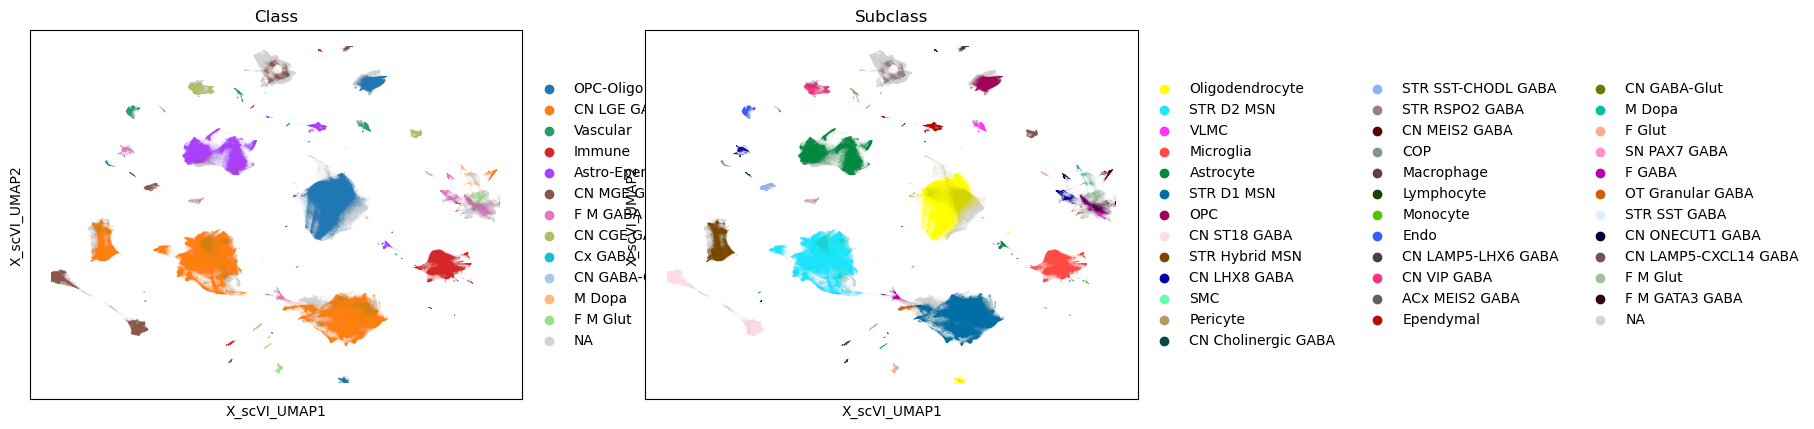

In [9]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['Class','Subclass']
)
